In [26]:
# Load libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Reading in CSV
fetal_health = pd.read_csv('Data/Fetal_health.csv')
fetal_health.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Data Pre-Processing

In [28]:
def scale(fetal_health): 
    min_max_scaler = MinMaxScaler()
    scaled_data =  min_max_scaler.fit_transform(fetal_health) 
    return scaled_data

In [29]:
# Dropping unecessary/derived data columns
drop_col = ['fetal_health','histogram_width','histogram_min','histogram_max', 'histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_median','histogram_mean','histogram_variance','histogram_tendency']
# Training Data Paths
X = fetal_health.drop(drop_col, axis=1)
y = fetal_health['fetal_health']
print(X.shape, y.shape)

(2126, 11) (2126,)


In [30]:
feature_names = X.columns

In [31]:
# Describe the fetal_health data
print(X.describe())

       baseline value  accelerations  fetal_movement  uterine_contractions  \
count     2126.000000    2126.000000     2126.000000           2126.000000   
mean       133.303857       0.003178        0.009481              0.004366   
std          9.840844       0.003866        0.046666              0.002946   
min        106.000000       0.000000        0.000000              0.000000   
25%        126.000000       0.000000        0.000000              0.002000   
50%        133.000000       0.002000        0.000000              0.004000   
75%        140.000000       0.006000        0.003000              0.007000   
max        160.000000       0.019000        0.481000              0.015000   

       light_decelerations  severe_decelerations  prolongued_decelerations  \
count          2126.000000           2126.000000               2126.000000   
mean              0.001889              0.000003                  0.000159   
std               0.002960              0.000057               

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, shuffle=True)

In [33]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('CLF', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.814706 (0.023121)
LDA: 0.864706 (0.029529)
KNN: 0.881176 (0.026016)
RF: 0.943529 (0.015828)
CLF: 0.911176 (0.016937)
NB: 0.844118 (0.030367)
SVM: 0.855882 (0.017890)


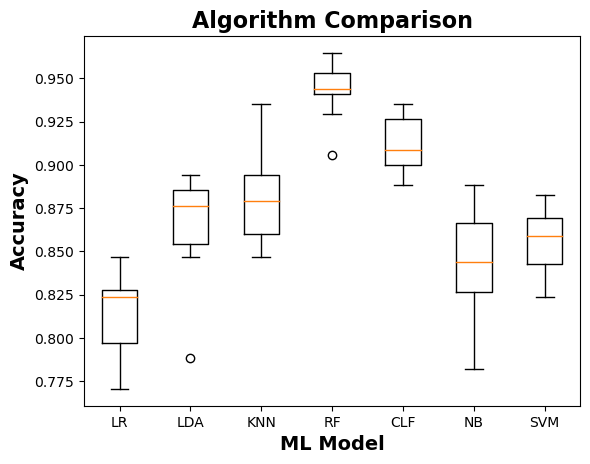

In [34]:
# Compare Algorithms
pyplot.style.use('default')
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison', fontsize=16, weight='bold')
pyplot.xlabel('ML Model', fontsize=14, weight='bold')
pyplot.ylabel('Accuracy', fontsize=14, weight='bold')
pyplot.rc('xtick', labelsize=14) 
pyplot.rc('ytick', labelsize=14) 
pyplot.savefig('fetal-health/static/images/Algorithm_Comparison.png')
pyplot.show()

## We can see that the box and whisker plots are between approximately 81% and 97% , as can be seen from the above plot the random forrest classifier achieves the highest accuracy.  

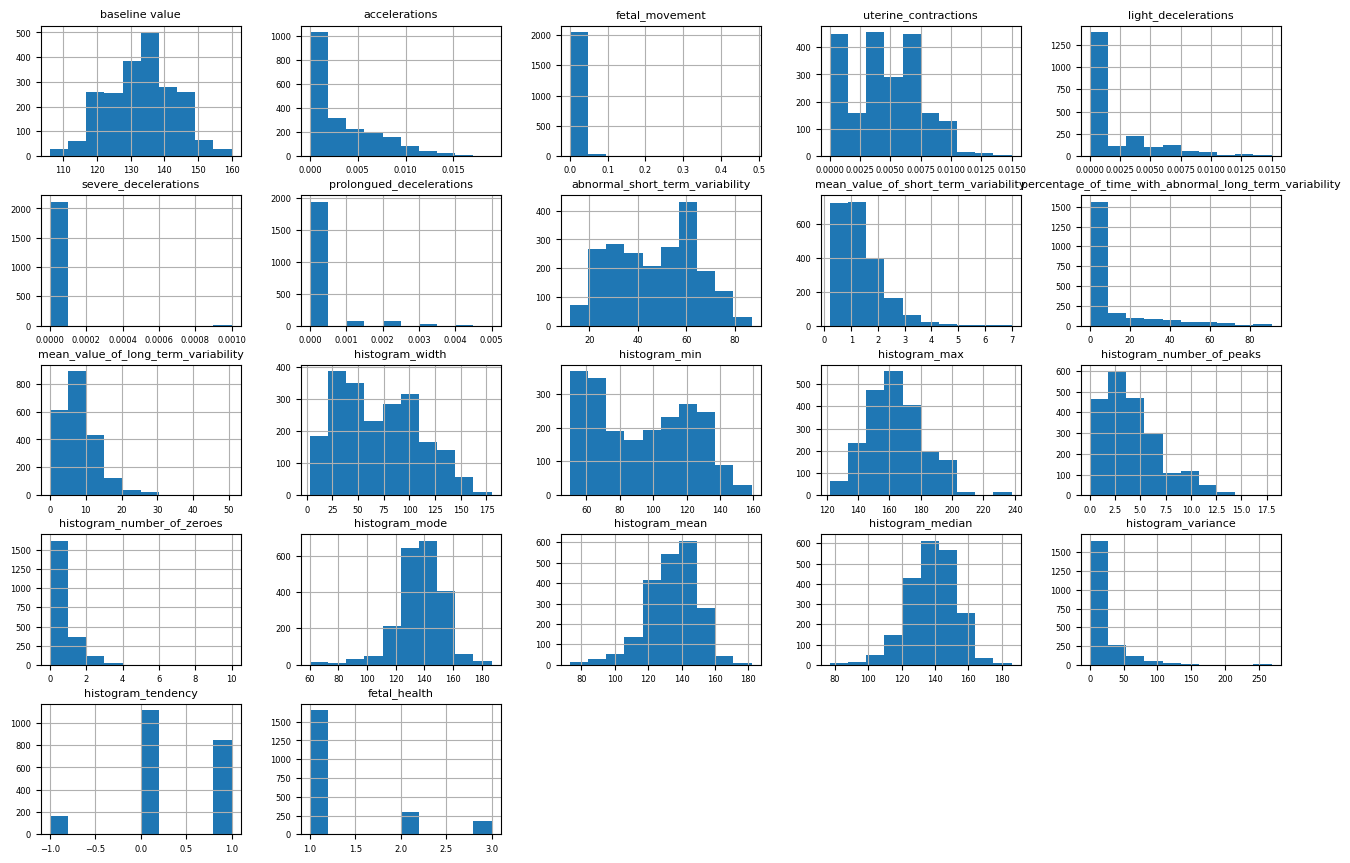

In [35]:
# Makes histograms of different columns in fetal_health
#pyplot.rcParams.update(pyplot.rcParamsDefault)
fig, ax = pyplot.subplots()
fig.set_size_inches(16, 10.5)
pyplot.rc('xtick', labelsize=6) 
pyplot.rc('ytick', labelsize=6) 
pyplot.rc('axes', titlesize=8)
fetal_health.hist(ax=ax)
fig.savefig('fetal-health/static/images/input_histograms.png')

In [36]:
# Create and score a decision tree classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9460093896713615

In [37]:
# Predict the response for the test dataset
y_pred = rf.predict(X_test)

In [38]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.19253672848763556, 'abnormal_short_term_variability'),
 (0.14989797269985738,
  'percentage_of_time_with_abnormal_long_term_variability'),
 (0.14922895550898457, 'mean_value_of_short_term_variability'),
 (0.11329552934290044, 'mean_value_of_long_term_variability'),
 (0.09945334852077492, 'baseline value'),
 (0.08788179159260993, 'prolongued_decelerations'),
 (0.07007349020476171, 'accelerations'),
 (0.06505105540633867, 'uterine_contractions'),
 (0.03907617780940609, 'fetal_movement'),
 (0.029337967827173145, 'light_decelerations'),
 (0.004166982599557546, 'severe_decelerations')]

## Since accuracy was over 90% the group wanted to see what columns could be dropped and still maintain 90% accuracy, first we dropped 'severe_decelerations', 'light_decelerations', 'fetal_movement'

In [39]:
# Dropping unecessary/derived data columns
drop_col1 = ['severe_decelerations', 'light_decelerations', 'fetal_movement']
# Training Data Paths
X_train1 = X_train.drop(drop_col1, axis=1)
X_test1 = X_test.drop(drop_col1, axis=1)
print(X_train1.shape, X_test1.shape)

(1700, 8) (426, 8)


In [40]:
# Create and score a decision tree classifier, round 2
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train1, y_train)
rf.score(X_test1, y_test)

0.9483568075117371

## Since accuracy was over 90% the group wanted to see what columns could be dropped and still maintain 90% accuracy, first we dropped 'accelerations', 'uterine_contractions'

In [41]:
# Dropping unecessary/derived data columns
drop_col2 = ['accelerations', 'uterine_contractions']
# Training Data Paths
X_train2 = X_train1.drop(drop_col2, axis=1)
X_test2 = X_test1.drop(drop_col2, axis=1)
print(X_train2.shape, X_test2.shape)

(1700, 6) (426, 6)


In [42]:
# Create and score a decision tree classifier, round 3
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train2, y_train)
rf.score(X_test2, y_test)

0.9389671361502347

## Since accuracy was over 90% the group wanted to see what columns could be dropped and still maintain 90% accuracy, first we dropped 'baseline value', 'mean_value_of_long_term_variability'

In [43]:
# Dropping unecessary/derived data columns
drop_col3 = ['baseline value', 'mean_value_of_long_term_variability']
# Training Data Paths
X_train3 = X_train2.drop(drop_col3, axis=1)
X_test3 = X_test2.drop(drop_col3, axis=1)
print(X_train3.shape, X_test3.shape)

(1700, 4) (426, 4)


In [44]:
# Create and score a decision tree classifier, round 4
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train3, y_train)
rf.score(X_test3, y_test)

0.9225352112676056

## Since accuracy was over 90% the group wanted to see if it was possible to drop , first we dropped 'prolongued_decelerations' instead of 'mean_value_of_long_term_variability'

In [45]:
# Dropping unecessary/derived data columns
drop_col4 = ['baseline value', 'prolongued_decelerations']
# Training Data Paths
X_train4 = X_train2.drop(drop_col3, axis=1)
X_test4 = X_test2.drop(drop_col3, axis=1)
print(X_train4.shape, X_test4.shape)

(1700, 4) (426, 4)


In [46]:
# Create and score a decision tree classifier, round 4
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train4, y_train)
rf.score(X_test4, y_test)

0.9178403755868545

## Checking to see if mean values could be dropped and still maintain 90% accuracy

In [47]:
# Dropping unecessary/derived data columns
drop_col5 = ['severe_decelerations', 'light_decelerations', 'fetal_movement', 'mean_value_of_short_term_variability', 'mean_value_of_long_term_variability']
# Training Data Paths
X_train5 = X_train.drop(drop_col5, axis=1)
X_test5 = X_test.drop(drop_col5, axis=1)
print(X_train5.shape, X_test5.shape)

(1700, 6) (426, 6)


In [48]:
# Create and score a decision tree classifier, round 5
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train5, y_train)
rf.score(X_test5, y_test)

0.9295774647887324

In [49]:
# Show current columns that will be used in the model
print(X_train5.columns)

Index(['baseline value', 'accelerations', 'uterine_contractions',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability'],
      dtype='object')


## Hypertuning the Groups selected columns

In [50]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train5, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000, 1100, 1200]},
                   random_state=42, verbose=2)

In [54]:
#Finding the best paramaters based on the above hypertuning
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [61]:
# Use hypertuning parameters to train random forest classifier (ran previously and these were the numbers that were obtained)
final_model = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=20, bootstrap=True)
final_model = final_model.fit(X_train5, y_train)
final_model.score(X_test5, y_test)

0.9272300469483568

## Saving the model for reference in the flask app

In [62]:
# Save the ML model 
filename = 'fetal-health/finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))
# To load file use following command-loaded_model = joblib.load('finalized_model.sav')

In [65]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.fit(X_test, y_test)
result = loaded_model.score(X_test, y_test)
print(result)

0.971830985915493
